## Content
* [Sequence Models](#1)
* [Recurrent Neural Network (RNN)](#2)
    * [Implementing Recurrent Neural Network with Keras](#3)
        * [Importing and Preprocessing Data](#4)
            * [Loading Data](#5)
            * [Feature Scaling](#6)
            * [Create Data Structure](#7)
            * [Reshape](#8)
        * [Create RNN Model](#9)
        * [Prediction and Visualization of RNN Model](#10)
* [Long Short Term Memory (LSTM)](#11)
    * [Implementing Long Short Term Memory with Keras](#12)
        * [Loading Data](#13)
        * [Preprocessing Data](#14)
            * [Reshape](#15)
            * [Scaling](#16)
            * [Train Test Split](#17)
        * [Create LSTM Model](#18)
        * [Predictions and Visualising LSTM Model](#19)


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

<a id="1"></a>
**Sequence Models**

* Sequence models plays an over time.

* Speech recognition, NLP, music generation (Apple siri, Goggle's voice search...)

* Sentiment classification (duygu sınıflandırma). Örneğin, bir cümlenin olumlu - olumsuz olma durumunu anlama

* Özetle, Sequence models time series modeldir.

<a id="2"></a>
**Recurrent Neural Network (RNN)**

* RNN is able to remember important things about the input received, which enables them to be very precise in predicting what's coming next.

* This is the reason why they are preferred algorithm for sequential data like time series, speech, text, financial data, audio, video because they can perform a much deeper understanding of a sequence and its content compared to the other algorithms.

* Not only feeds output but also gives feed backs into itself. Because RNN has internal memory. How? RNN has hidden layers which have temporal loop (kendini besleyen zamansal döngüye sahiptir ve geçici belleğe sahiptir). 

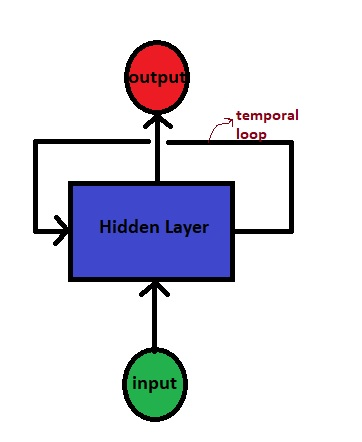

* Örnek RNN Yapıları:

    * One to Many: input image, output bunla ilgili bir cümle
    
    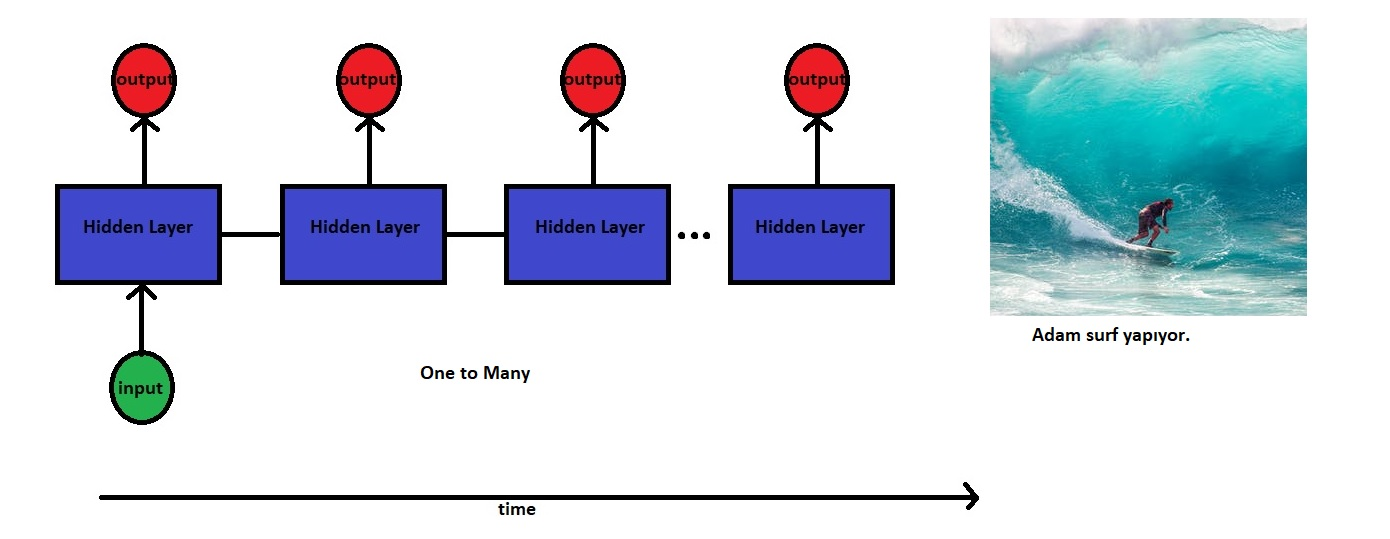
    
    * Many to one: input cümle, output bu cümleyle ilgili bir duygu 
    
    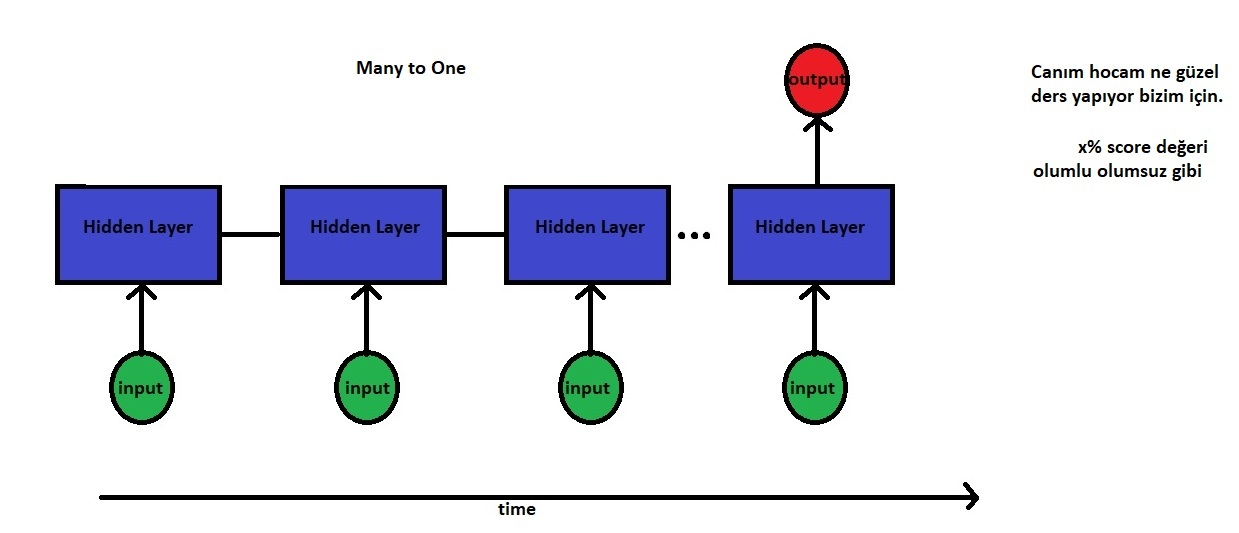
    
    * Many to many: mesela google translate kullanarak bir cümle translate etmek
    
    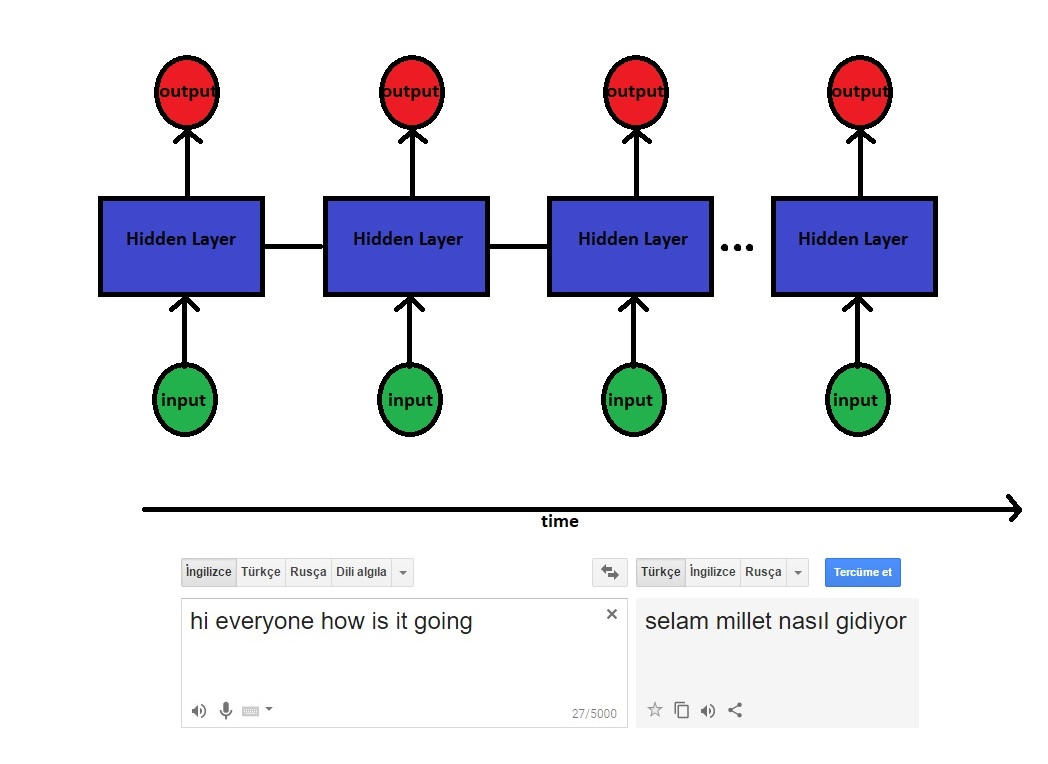
    
    
    
* Not: RNN short term memory'ye sahip, ancak LSTM long term memory'ye sahip olabilir. 

* Exploiding Gradients: Gradient'in çok büyük olması ve gereksiz yere weight'lere önem kazandırması durumu.

* Vanishing Gradients: Gradient'in çok küçük olması ve yavaş öğrenme durumu

* Gradient: Weight'lerdeki cost'a göre değişim

<a id="3"></a>
**Implementing RNN with KERAS**

<a id="4"></a>
**Importing and Preprocessind Data**

<a id="5"></a>
**Loading Data:**

In [ ]:
#dataset_train = pd.read_csv('../input/stockprice-train/Stock_Price_Train.csv')
dataset_train = pd.read_csv('../input/international-airline-passengers/international-airline-passengers.csv')

In [ ]:
dataset_train.head()

In [ ]:
#open'ı kullanıcaz sadece:
#train = dataset_train.loc[:, ['Open']].values #array'e çevirdik
train = dataset_train.loc[:, ['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60']].values
train

<a id="6"></a>
**Feature Scaling:**

In [ ]:
from sklearn.preprocessing import MinMaxScaler #bununla, 0-1 arasına scale ettik
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

In [ ]:
plt.plot(train_scaled)

In [ ]:
dataset_train.shape

<a id="7"></a>
**Create Data Structure:**

In [ ]:
#ilk 1-50 yi alıp X_train'e, 51. data point'i de y_train'e,
#2-51'i alıp X_train'e, 52'yi y_train'e ...olacak şekilde data frame i oluşturuyoruz:
X_train = []
y_train = []
timesteps = 50

#for i in range(timesteps, 1250):
for i in range(timesteps, 145):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

<a id="8"></a>
**Reshape:**

In [ ]:
#Reshaping:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

<a id="9"></a>
**Create RNN Model**

In [ ]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


* Epochs artırılbilir
* Batch size değiştirilebilir
* Activation functionlar değiştirilebilir
* Layer sayısı artırılabilir

<a id="10"></a>
**Prediction and Visualization of RNN Model**

In [ ]:
#dataset_test = pd.read_csv('../input/stockprice-test/Stock_Price_Test.csv')
dataset_test = pd.read_csv('../input/international-airline-passengers/international-airline-passengers.csv')
dataset_test.head()

In [ ]:
#real_stock_price = dataset_test.loc[:, ['Open']].values
real_stock_price = dataset_test.loc[:, ['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60']].values
real_stock_price

In [ ]:
#Getting the predicted stock price
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
dataset_total = pd.concat((dataset_train['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dataset_test['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #minmax scaler
inputs

In [ ]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
#inverse_transform ile, scale edildikten sonra predict edilen değerleri gerçek değer aralığına çekiyoruz

In [ ]:
plt.plot(real_stock_price, color='red', label='Real monthly totals in thousands. Jan 49 ? Dec 60')
plt.plot(predicted_stock_price, color='blue', label='Predicted monthly totals in thousands. Jan 49 ? Dec 60')
plt.title('monthly totals in thousands. Jan 49 ? Dec 60 Prediction')
plt.xlabel('Time')
plt.ylabel('monthly totals in thousands. Jan 49 ? Dec 60')
plt.legend()
plt.show()

<a id="11"></a>
**Long Short Term Memory (LSTM)**

* LSTM, RNN'in bir türüdür.

* RNN'den farklı olarak long term memory'den bahsedebiliriz.

* LSTM architecture:

    * x: Scaling of information (x=0 ise 1'den gelen bilgi Ct-1 okuna dahil olamayacak)
    
    * +: Adding information (+da gelen bilginin dahil olamaması gibi bir durum söz konusu değil, +'nın aşağısındaki oktan gelen bilgi her zaman eklenecek)
    
    * Sigmoid layer: Sigmoid memory'den birşeyi hatırlamak için ya da unutmak için kullanılır.  1 ya da 0'dır. gate olarak adlandırılır.
    
    * tanh: Activation function olarak kullanılır çünkü türevi hemen 0'a inmez, bu da vanishing gradient(yavaş öğrenme) problemini çözer.
    
    * h(t-1): Output of LSTM unit (bir önceki layer'dan gelen output).
    
    * c(t-1): Memory from previous LSTM unit
    
    * X(t): input
    
    * c(t): new updated memory
    
    * h(t): output
    
    * From c(t-1) to c(t) is memory pipeline
    
    * Oklar vektörel değerler
    
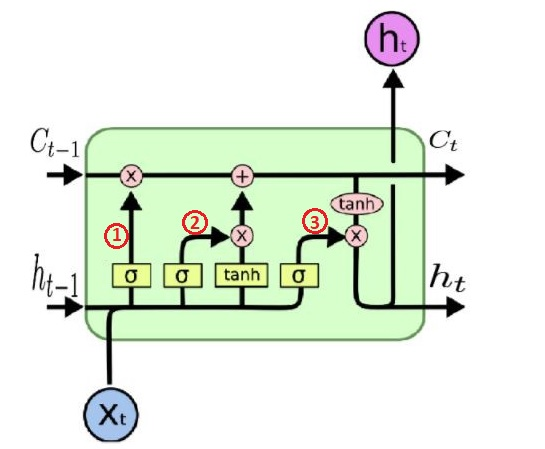


* Yapılar (görselde 1, 2, 3)
    * 1-Forget Gate: Input olarak X(t) ve h(t-1) alır. Gelen bilginin unutulup unutulmayacağına karar verir.
    
    * 2-Input Gate: Hangi bilginin memoryde depolanıp depolanmayacağına karar verir. 2 numaralı oka gelen bilgi sigmoid'den geçerek 0 ya da 1 değerini alarak tanh ile aktivasyona giriyor. Yani, yukarıdaki gibi sigmoid varsa 0-1.
    
    * 3-Output Gate: Hangi bilginin output olup olmayacağına karar veriyor.

<a id="12"></a>
**Implementing LSTM with KERAS**

<a id="13"></a>
**Loading Data**

In [ ]:
data = pd.read_csv('../input/international-airline-passengers/international-airline-passengers.csv')
data.head()

In [ ]:
#International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
dataset = data.iloc[:, 1].values
dataset

In [ ]:
dataset = data.iloc[:, 1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers (in thousands)')
plt.title('Passengers')
plt.show()

<a id="14"></a>
**Preprocessing Data**

In [ ]:
dataset.shape

<a id="15"></a>
**Reshape:**

In [ ]:
dataset = dataset.reshape(-1,1) #(145, ) iken (145,1)e çevirdik
dataset = dataset.astype('float32')
dataset.shape

<a id="16"></a>
**Scaling:**

In [ ]:
#scaling the values to range between 0 and 1
scaler = MinMaxScaler(feature_range= (0,1))
dataset = scaler.fit_transform(dataset)
#dataset

<a id="17"></a>
**Train Test Split:**

In [ ]:
train_size = int(len(dataset)*0.5)
test_size = len(dataset)- train_size

train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

print('train size: {}, test size: {}'.format(len(train), len(test)))

In [ ]:
dataX = []
datay = []
timestemp = 10

for i in range(len(train)- timestemp -1):
    a = train[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(train[i + timestemp, 0])

    
trainX, trainy = np.array(dataX), np.array(datay)

In [ ]:
dataX = []
datay = []
for i in range(len(test)- timestemp -1):
    a = test[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(test[i + timestemp, 0])

    
testX, testy = np.array(dataX), np.array(datay)

In [ ]:
trainX.shape

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0],1,  trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,  testX.shape[1]))

In [ ]:
trainX.shape

<a id="18"></a>
**Create LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, timestemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainy, epochs=50, batch_size=1)

<a id="19"></a>
**Prediction**

In [ ]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainy])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([testy])

import math
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainy[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testy[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestemp:len(trainPredict)+timestemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()